In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os

print(os.listdir("./data"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


['US_category_id.json', 'USvideos.csv', 'UScomments.csv']


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
pd.set_option('display.max_columns',None)

In [4]:
US_comments = pd.read_csv('./data/UScomments.csv', error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [5]:
US_videos = pd.read_csv('./data/USvideos.csv', error_bad_lines=False)

In [6]:
US_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
US_videos.shape

(40949, 16)

In [8]:
#atributos que contém em cada video
US_videos.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [9]:
US_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [10]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [11]:
US_comments.shape

(691400, 4)

In [12]:
#atributos de cada comentário
US_comments.nunique()

video_id          2266
comment_text    434076
likes             1284
replies            479
dtype: int64

In [13]:
US_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [14]:
US_comments.drop(30000, inplace=True)

In [15]:
US_comments = US_comments.reset_index().drop('index',axis=1)

In [17]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [18]:
#Removendo pontuação, números e caractéres especiais
US_comments['comment_text'] = US_comments['comment_text'].str.replace("[^a-zA-Z#]", " ")

In [20]:
US_comments_new = US_comments[US_comments['comment_text']!= 'NaN']


In [21]:
#Removendo palavras curtas
US_comments_new['comment_text'] = US_comments_new['comment_text'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>3]))

In [22]:
#Colocando o texto em minúsculo
US_comments_new['comment_text'] = US_comments_new['comment_text'].apply(lambda x:x.lower())

In [23]:
#Tokenização
tokenized_tweet = US_comments_new['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

In [24]:
US_comments_new.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul,4,0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0
2,XpVt6Z1Gjjo,kong maverick,3,0
3,XpVt6Z1Gjjo,attendance,3,0
4,XpVt6Z1Gjjo,trending,3,0


In [25]:
#Lematização
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [26]:
wnl = WordNetLemmatizer()

In [27]:
tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))]) 
tokenized_tweet.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

In [28]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [29]:
US_comments_new['comment_text'] = tokenized_tweet

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [31]:
#Definindo os scores de sentimentos
US_comments_new['Sentiment Scores'] = US_comments_new['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [32]:
US_comments_new.head()

,video_id,comment_text,likes,replies,Sentiment Scores
0,XpVt6Z1Gjjo,logan paul,4,0,0.0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0
3,XpVt6Z1Gjjo,attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending,3,0,0.0


In [33]:
#Classificando o score de sentimento em Positivo, negativo ou neutro
US_comments_new['Sentiment'] = US_comments_new['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [34]:
US_comments_new.head()

,video_id,comment_text,likes,replies,Sentiment Scores,Sentiment
0,XpVt6Z1Gjjo,logan paul,4,0,0.0,Neutral
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0,Neutral
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0,Neutral
3,XpVt6Z1Gjjo,attendance,3,0,0.0,Neutral
4,XpVt6Z1Gjjo,trending,3,0,0.0,Neutral


In [35]:
US_comments_new.Sentiment.value_counts()

Positive    305357
Neutral     261012
Negative    125030
Name: Sentiment, dtype: int64

In [36]:
#Calculando a porcentagem de comentáriso positivos em todos os vídeos
videos = []
for i in range(0,US_comments_new.video_id.nunique()):
    a = US_comments_new[(US_comments_new.video_id == US_comments_new.video_id.unique()[i]) & (US_comments_new.Sentiment == 'Positive')].count()[0]
    b = US_comments_new[US_comments_new.video_id == US_comments_new.video_id.unique()[i]]['Sentiment'].value_counts().sum()
    Percentage = (a/b)*100
    videos.append(round(Percentage,2))

In [37]:
#criando novo dataframe dos videos com porcentagens positivas
Positivity = pd.DataFrame(videos,US_comments_new.video_id.unique()).reset_index()

In [38]:
Positivity.columns = ['video_id','Positive Percentage']

In [39]:
Positivity.head()


,video_id,Positive Percentage
0,XpVt6Z1Gjjo,34.38
1,cLdxuaxaQwc,35.54
2,WYYvHb03Eog,37.25
3,sjlHnJvXdQs,37.62
4,cMKX2tE5Luk,41.57


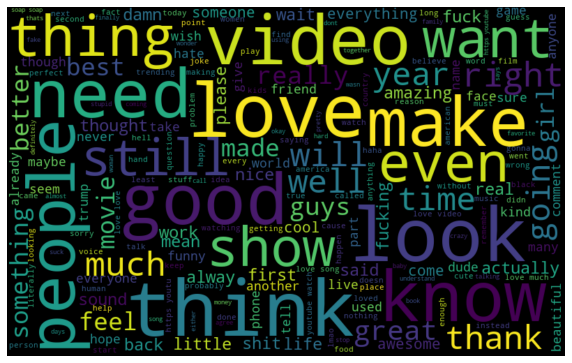

In [48]:
all_words = ' '.join([text for text in US_comments_new['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
all_words_posi = ' '.join([text for text in US_comments_new['comment_text'][US_comments_new.Sentiment == 'Positive']])

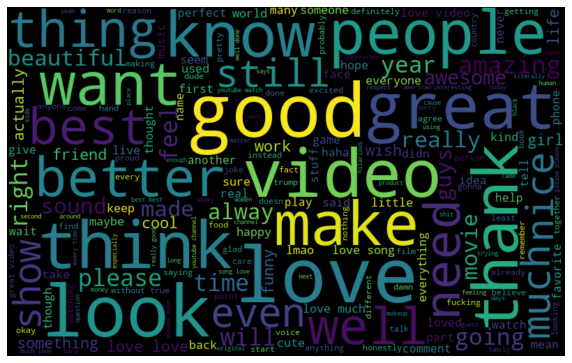

In [50]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

In [51]:
all_words_nega = ' '.join([text for text in US_comments_new['comment_text'][US_comments_new.Sentiment == 'Negative']])

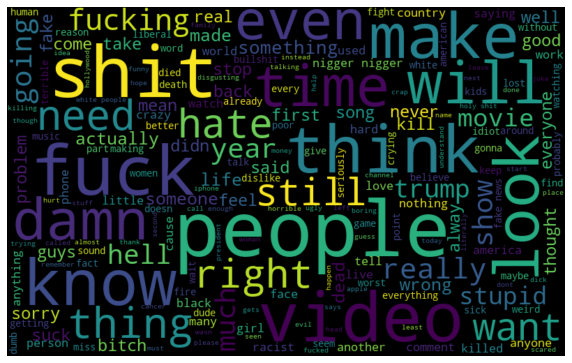

In [52]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

In [54]:
all_words_neu = ' '.join([text for text in US_comments_new['comment_text'][US_comments_new.Sentiment == 'Neutral']])

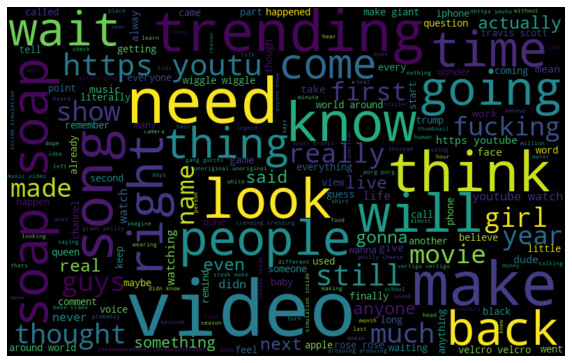

In [55]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()